In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import Imputer
import math

import copy
import argparse

%matplotlib inline

In [2]:
ames_train = pd.read_csv('./datasets/train.csv')
ames_test = pd.read_csv('./datasets/test.csv')
ames_test_1 = pd.read_csv('./datasets/test.csv')
ames_train_numeric = ames_train._get_numeric_data()
ames_test_numeric = ames_test._get_numeric_data()
print(ames_train.shape)
print(ames_test.shape)
# y = np.log(ames_train['SalePrice'])
# print(y.shape)

(2051, 81)
(879, 80)


In [3]:
ames_train_numeric.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [4]:
def get_log_1(df):
    return df.applymap(
        lambda x: math.log(x) if x != 0 else 0)

In [5]:
ames_train_numeric_log = get_log_1(ames_train_numeric)

In [6]:
ames_train_numeric_log.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,4.691348,20.094692,4.094345,NaN,9.511703,1.791759,2.079442,7.588830,7.603399,5.666427,...,0.00000,3.784190,0.0,0.0,0.0,0.0,0.0,1.098612,7.605890,11.779129
1,6.298949,20.090986,4.094345,3.761200,9.349406,1.945910,1.609438,7.598900,7.599401,4.882802,...,0.00000,4.304065,0.0,0.0,0.0,0.0,0.0,1.386294,7.605392,12.301383
2,5.030438,20.098346,2.995732,4.219508,8.977399,1.609438,1.945910,7.577122,7.604396,0.000000,...,0.00000,3.951244,0.0,0.0,0.0,0.0,0.0,0.000000,7.605890,11.599103
3,5.762051,20.635948,4.094345,4.290459,9.190342,1.609438,1.609438,7.603898,7.604396,0.000000,...,4.60517,0.000000,0.0,0.0,0.0,0.0,0.0,1.386294,7.605890,12.066811
4,5.541264,20.625019,3.912023,4.406719,9.563459,1.791759,2.079442,7.549609,7.597396,0.000000,...,0.00000,4.077537,0.0,0.0,0.0,0.0,0.0,1.098612,7.605890,11.838626


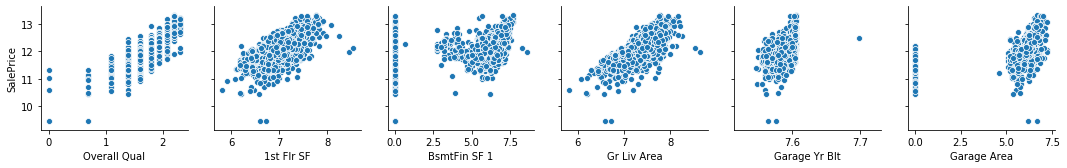

In [7]:
pp = sns.pairplot(data=ames_train_numeric_log,
                  x_vars=['Overall Qual','1st Flr SF', 'BsmtFin SF 1', 'Gr Liv Area', 'Garage Yr Blt', 'Garage Area'],
                  y_vars=['SalePrice'])

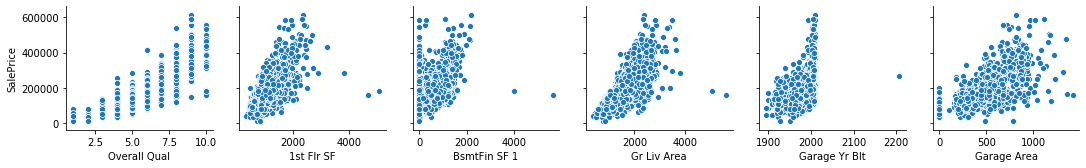

In [8]:
pp = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Overall Qual','1st Flr SF', 'BsmtFin SF 1', 'Gr Liv Area', 'Garage Yr Blt', 'Garage Area'],
                  y_vars=['SalePrice'])

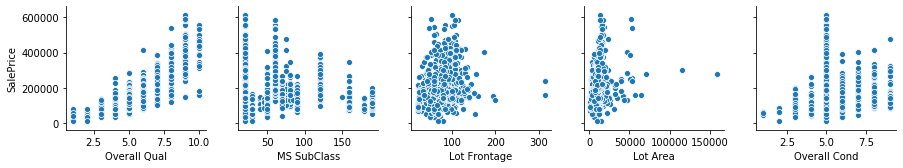

In [9]:
pp = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Overall Qual','MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Cond'],
                  y_vars=['SalePrice'])

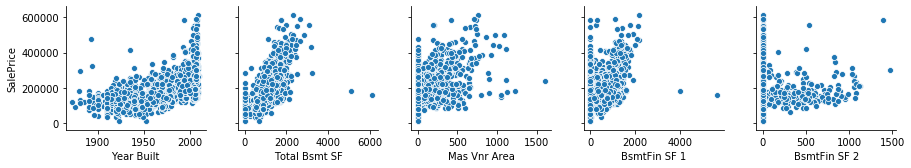

In [10]:
pp1 = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Year Built','Total Bsmt SF', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2'],
                  y_vars=['SalePrice'])

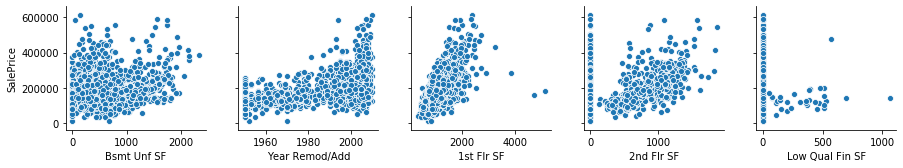

In [11]:
pp2 = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Bsmt Unf SF','Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'],
                  y_vars=['SalePrice'])

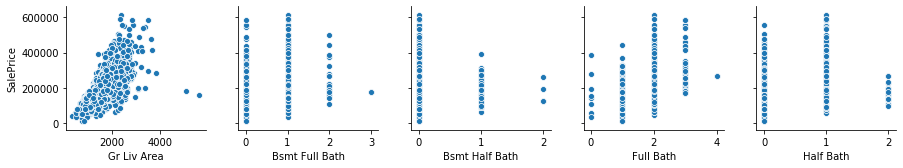

In [12]:
pp3 = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Gr Liv Area','Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'],
                  y_vars=['SalePrice'])

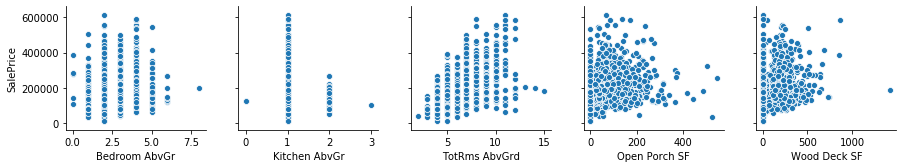

In [13]:
pp4 = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Bedroom AbvGr','Kitchen AbvGr', 'TotRms AbvGrd', 'Open Porch SF', 'Wood Deck SF'],
                  y_vars=['SalePrice'])

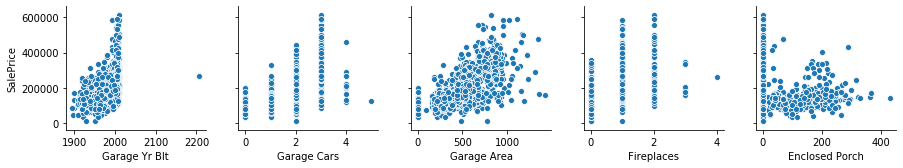

In [14]:
pp5 = sns.pairplot(data=ames_train_numeric,
                  x_vars=['Garage Yr Blt','Garage Cars', 'Garage Area', 'Fireplaces', 'Enclosed Porch'],
                  y_vars=['SalePrice'])

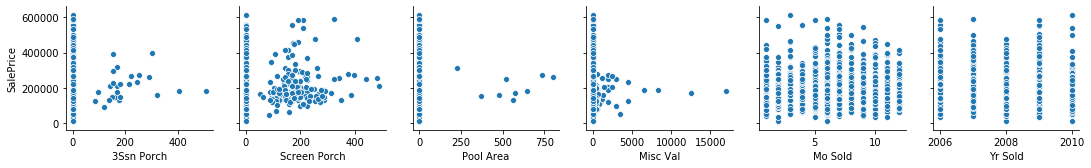

In [15]:
pp6 = sns.pairplot(data=ames_train_numeric,
                  x_vars=['3Ssn Porch','Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
                  y_vars=['SalePrice'])

In [ ]:
pp = sns.pairplot(data=ames_train,
        x_vars=['GLA_OQ'],
        y_vars=, hue='Neighborhood', height=15);
pp.fig.set_size_inches(18, 9);

#  'Gr Liv Area', 'TotRms AbvGrd', '1st Flr SF', 'Year Built'

In [ ]:
pp = sns.pairplot(data=ames_train,
        x_vars=['Quality_sq'],
        y_vars=['SalePrice'], hue='Neighborhood', height=15);
pp.fig.set_size_inches(18, 9);

#  'Gr Liv Area', 'TotRms AbvGrd', '1st Flr SF', 'Year Built'

In [ ]:
pp = sns.pairplot(data=ames_train,
        x_vars=['quality_sq_ft'],
        y_vars=['SalePrice'], hue='Neighborhood', height=15);
pp.fig.set_size_inches(18, 9);


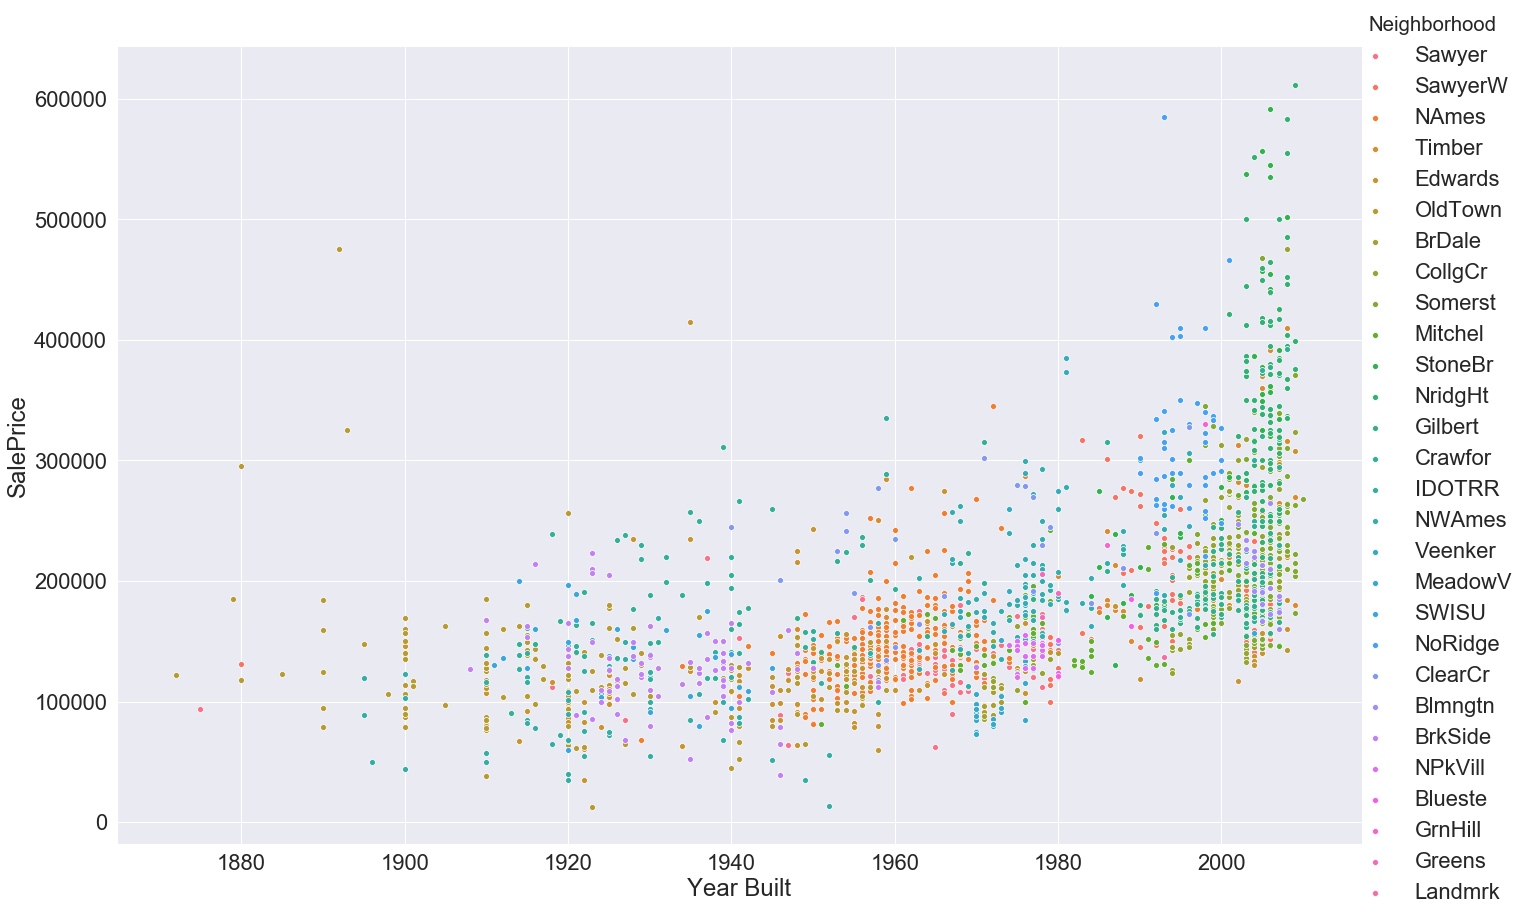

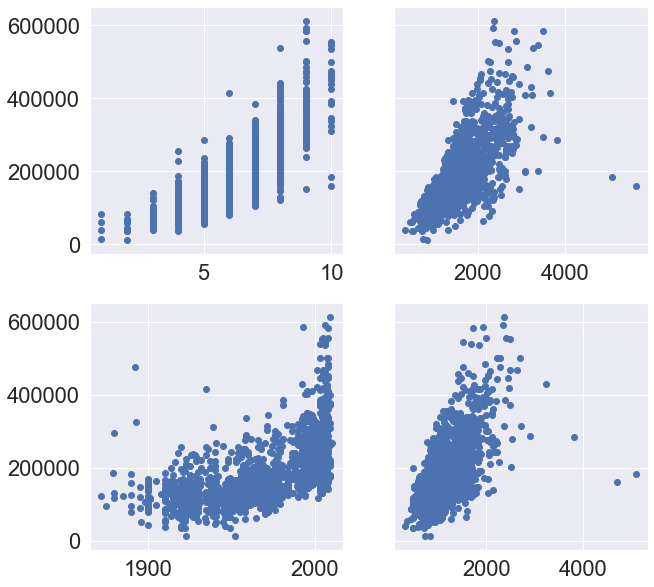

In [55]:
pp = sns.pairplot(data=ames_train,
                  x_vars=['Year Built'],
                  y_vars=['SalePrice'], hue='Neighborhood', height=21);
pp.fig.set_size_inches(21, 12);

#  'Gr Liv Area', 'TotRms AbvGrd', '1st Flr SF', 'Year Built'

f, ax = plt.subplots(2, 2, sharey=True, figsize=(10,10))
ax[0,0].scatter(ames_train['Overall Qual'], ames_train['SalePrice'])
# ax.set_title('Sharing Y axis')
ax[0,1].scatter(ames_train['Gr Liv Area'], ames_train['SalePrice'], )
ax[1,0].scatter(ames_train['Year Built'], ames_train['SalePrice'], )
ax[1,1].scatter(ames_train['1st Flr SF'], ames_train['SalePrice'], )

plt.show()


In [ ]:
# sns.pairplot(df, x_vars=['Accept', 'Enroll', 'F.Undergrad'], y_vars=['Apps'], kind='reg');
# sns.boxplot(df.Apps)

In [16]:
ames_train['base_1st'] = ames_train['Total Bsmt SF'] * ames_train['1st Flr SF']
ames_test['base_1st'] = ames_test['Total Bsmt SF'] * ames_test['1st Flr SF']
ames_train_numeric_log['base_1st'] = ames_train_numeric_log['Total Bsmt SF'] * ames_train_numeric_log['1st Flr SF']


In [17]:
ames_train['quality_year'] = ames_train['Overall Qual'] * ames_train['Year Built']
ames_test['quality_year'] = ames_test['Overall Qual'] * ames_test['Year Built']
ames_train_numeric_log['quality_year'] = ames_train_numeric_log['Overall Qual'] * ames_train_numeric_log['Year Built']


In [18]:
ames_train['quality_sq_ft'] = ames_train['Overall Qual'] * ames_train['1st Flr SF']
ames_test['quality_sq_ft'] = ames_test['Overall Qual'] * ames_test['1st Flr SF']
ames_train_numeric_log['quality_sq_ft'] = ames_train_numeric_log['Overall Qual'] * ames_train_numeric_log['1st Flr SF']


In [19]:
ames_train['garage_area_cars'] = ames_train['Garage Area'] * ames_train['Garage Cars']
ames_test['garage_area_cars'] = ames_test['Garage Area'] * ames_test['Garage Cars']
ames_train_numeric_log['garage_area_cars'] = ames_train_numeric_log['Garage Area'] * ames_train_numeric_log['Garage Cars']


In [27]:
# ames_train['qual_neig'] = ames_train['Neighborhood'] * ames_train['Overall Qual']
# ames_test['qual_neig'] = ames_test['Neighborhood'] * ames_test['Overall Qual']
# ames_train_numeric_log['qual_neig'] = ames_train_numeric_log['Neighborhood'] * ames_train_numeric_log['Overall Qual']


In [21]:
ames_train['Quality_sq'] = ames_train['Overall Qual'] * ames_train['Overall Qual']
ames_test['Quality_sq'] = ames_test['Overall Qual'] * ames_test['Overall Qual']
ames_train_numeric_log['Quality_sq'] = ames_train_numeric_log['Overall Qual'] * ames_train_numeric_log['Overall Qual']


In [23]:
ames_train['GLA_OQ'] = ames_train['Gr Liv Area'] * ames_train['Overall Qual']
ames_test['GLA_OQ'] = ames_test['Gr Liv Area'] * ames_test['Overall Qual']
ames_train_numeric_log['GLA_OQ'] = ames_train_numeric_log['Gr Liv Area'] * ames_train_numeric_log['Overall Qual']


In [24]:
ames_train['GLA_SQ'] = ames_train['Gr Liv Area'] * ames_train['Gr Liv Area']
ames_test['GLA_SQ'] = ames_test['Gr Liv Area'] * ames_test['Gr Liv Area']
ames_train_numeric_log['GLA_SQ'] = ames_train_numeric_log['Gr Liv Area'] * ames_train_numeric_log['Gr Liv Area']


In [25]:
ames_train['Yr_brm'] = ames_train['Year Built'] * ames_train['Year Remod/Add']
ames_test['Yr_brm'] = ames_test['Year Built'] * ames_test['Year Remod/Add']
ames_train_numeric_log['Yr_brm'] = ames_train_numeric_log['Year Built'] * ames_train_numeric_log['Year Remod/Add']


In [26]:
ames_train['GLA_Bath'] = ames_train['Gr Liv Area'] * ames_train['Full Bath']
ames_test['GLA_Bath'] = ames_test['Gr Liv Area'] * ames_test['Full Bath']
ames_train_numeric_log['GLA_Bath'] = ames_train_numeric_log['Gr Liv Area'] * ames_train_numeric_log['Full Bath']


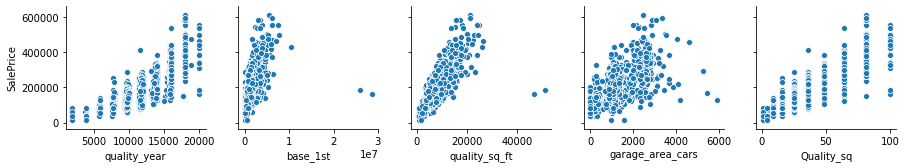

In [32]:
ppe1 = sns.pairplot(data=ames_train,
                  x_vars=['quality_year','base_1st', 'quality_sq_ft', 'garage_area_cars', 'Quality_sq'],
                  y_vars=['SalePrice'])

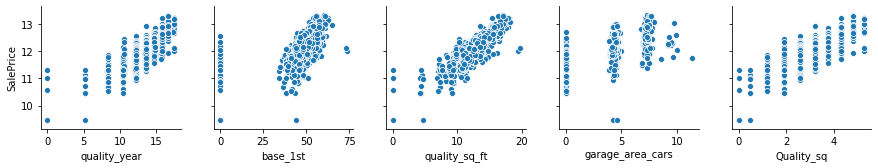

In [33]:
ppe1L = sns.pairplot(data=ames_train_numeric_log,
                  x_vars=['quality_year','base_1st', 'quality_sq_ft', 'garage_area_cars', 'Quality_sq'],
                  y_vars=['SalePrice'])

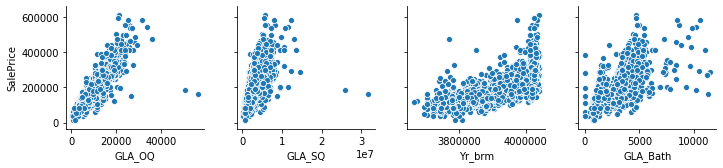

In [30]:
ppe2 = sns.pairplot(data=ames_train,
                  x_vars=['GLA_OQ','GLA_SQ', 'Yr_brm', 'GLA_Bath'],
                  y_vars=['SalePrice'])

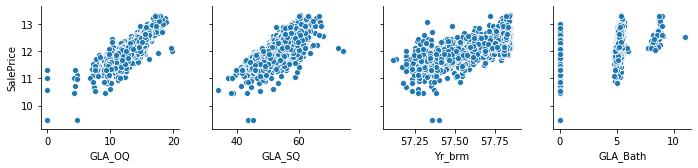

In [36]:
ppe2L = sns.pairplot(data=ames_train_numeric_log,
                  x_vars=['GLA_OQ','GLA_SQ', 'Yr_brm', 'GLA_Bath'],
                  y_vars=['SalePrice'])

In [53]:
ames_train_numeric_log.corr()[['SalePrice']].sort_values('SalePrice', ascending=False).head(12)

,SalePrice
SalePrice,1.000000
GLA_OQ,0.857322
quality_sq_ft,0.855315
Quality_sq,0.820529
quality_year,0.807762
Overall Qual,0.805379
Gr Liv Area,0.721365
GLA_SQ,0.719733
Yr_brm,0.677392
garage_area_cars,0.667354


In [54]:
ames_train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False).head(12)

,SalePrice
SalePrice,1.000000
GLA_OQ,0.837152
Quality_sq,0.825539
quality_year,0.806902
Overall Qual,0.800207
quality_sq_ft,0.792151
Gr Liv Area,0.697038
garage_area_cars,0.690671
GLA_Bath,0.682967
Garage Area,0.650270


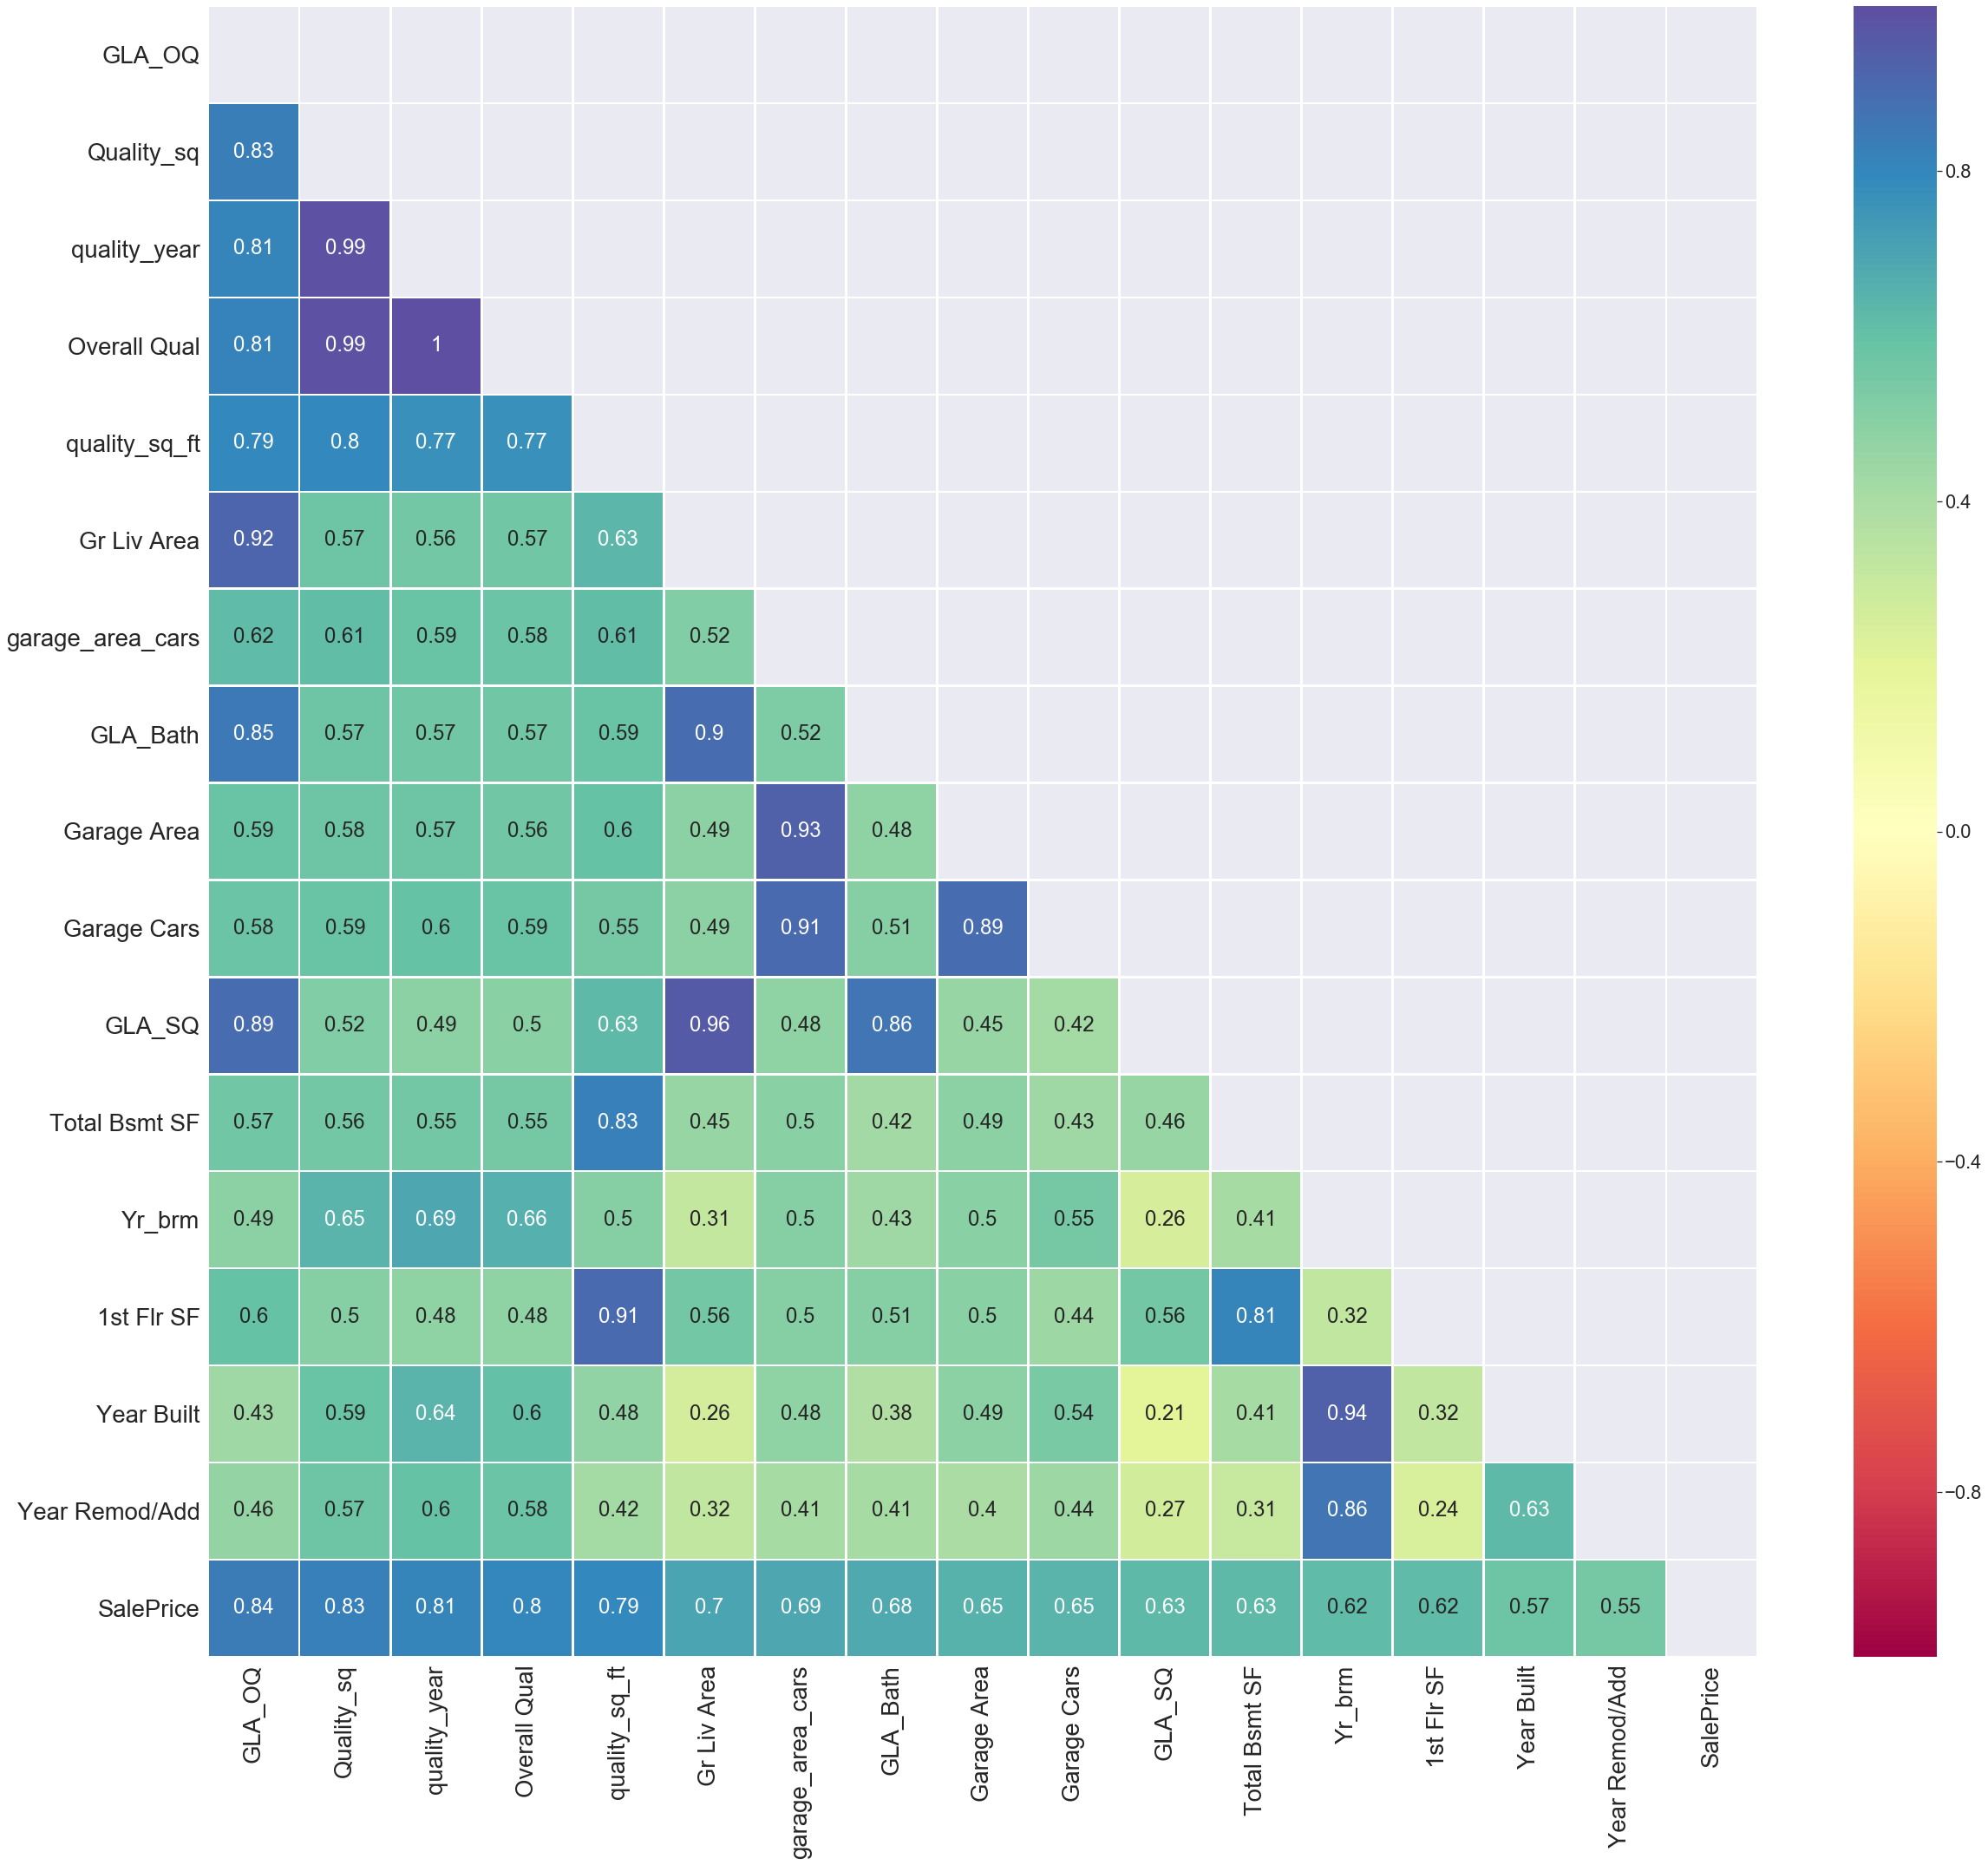

In [50]:
plt.figure(figsize = (40, 35))
plt.xticks(rotation=45)
mask = np.zeros_like(corr_1)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale = 2)
ax = sns.heatmap(corr_1, mask=mask, annot=True, cmap='Spectral', vmax=1, vmin=-1,
            square=False, linewidths=1.5,  cbar_kws={"shrink": 1.0}, xticklabels='auto')


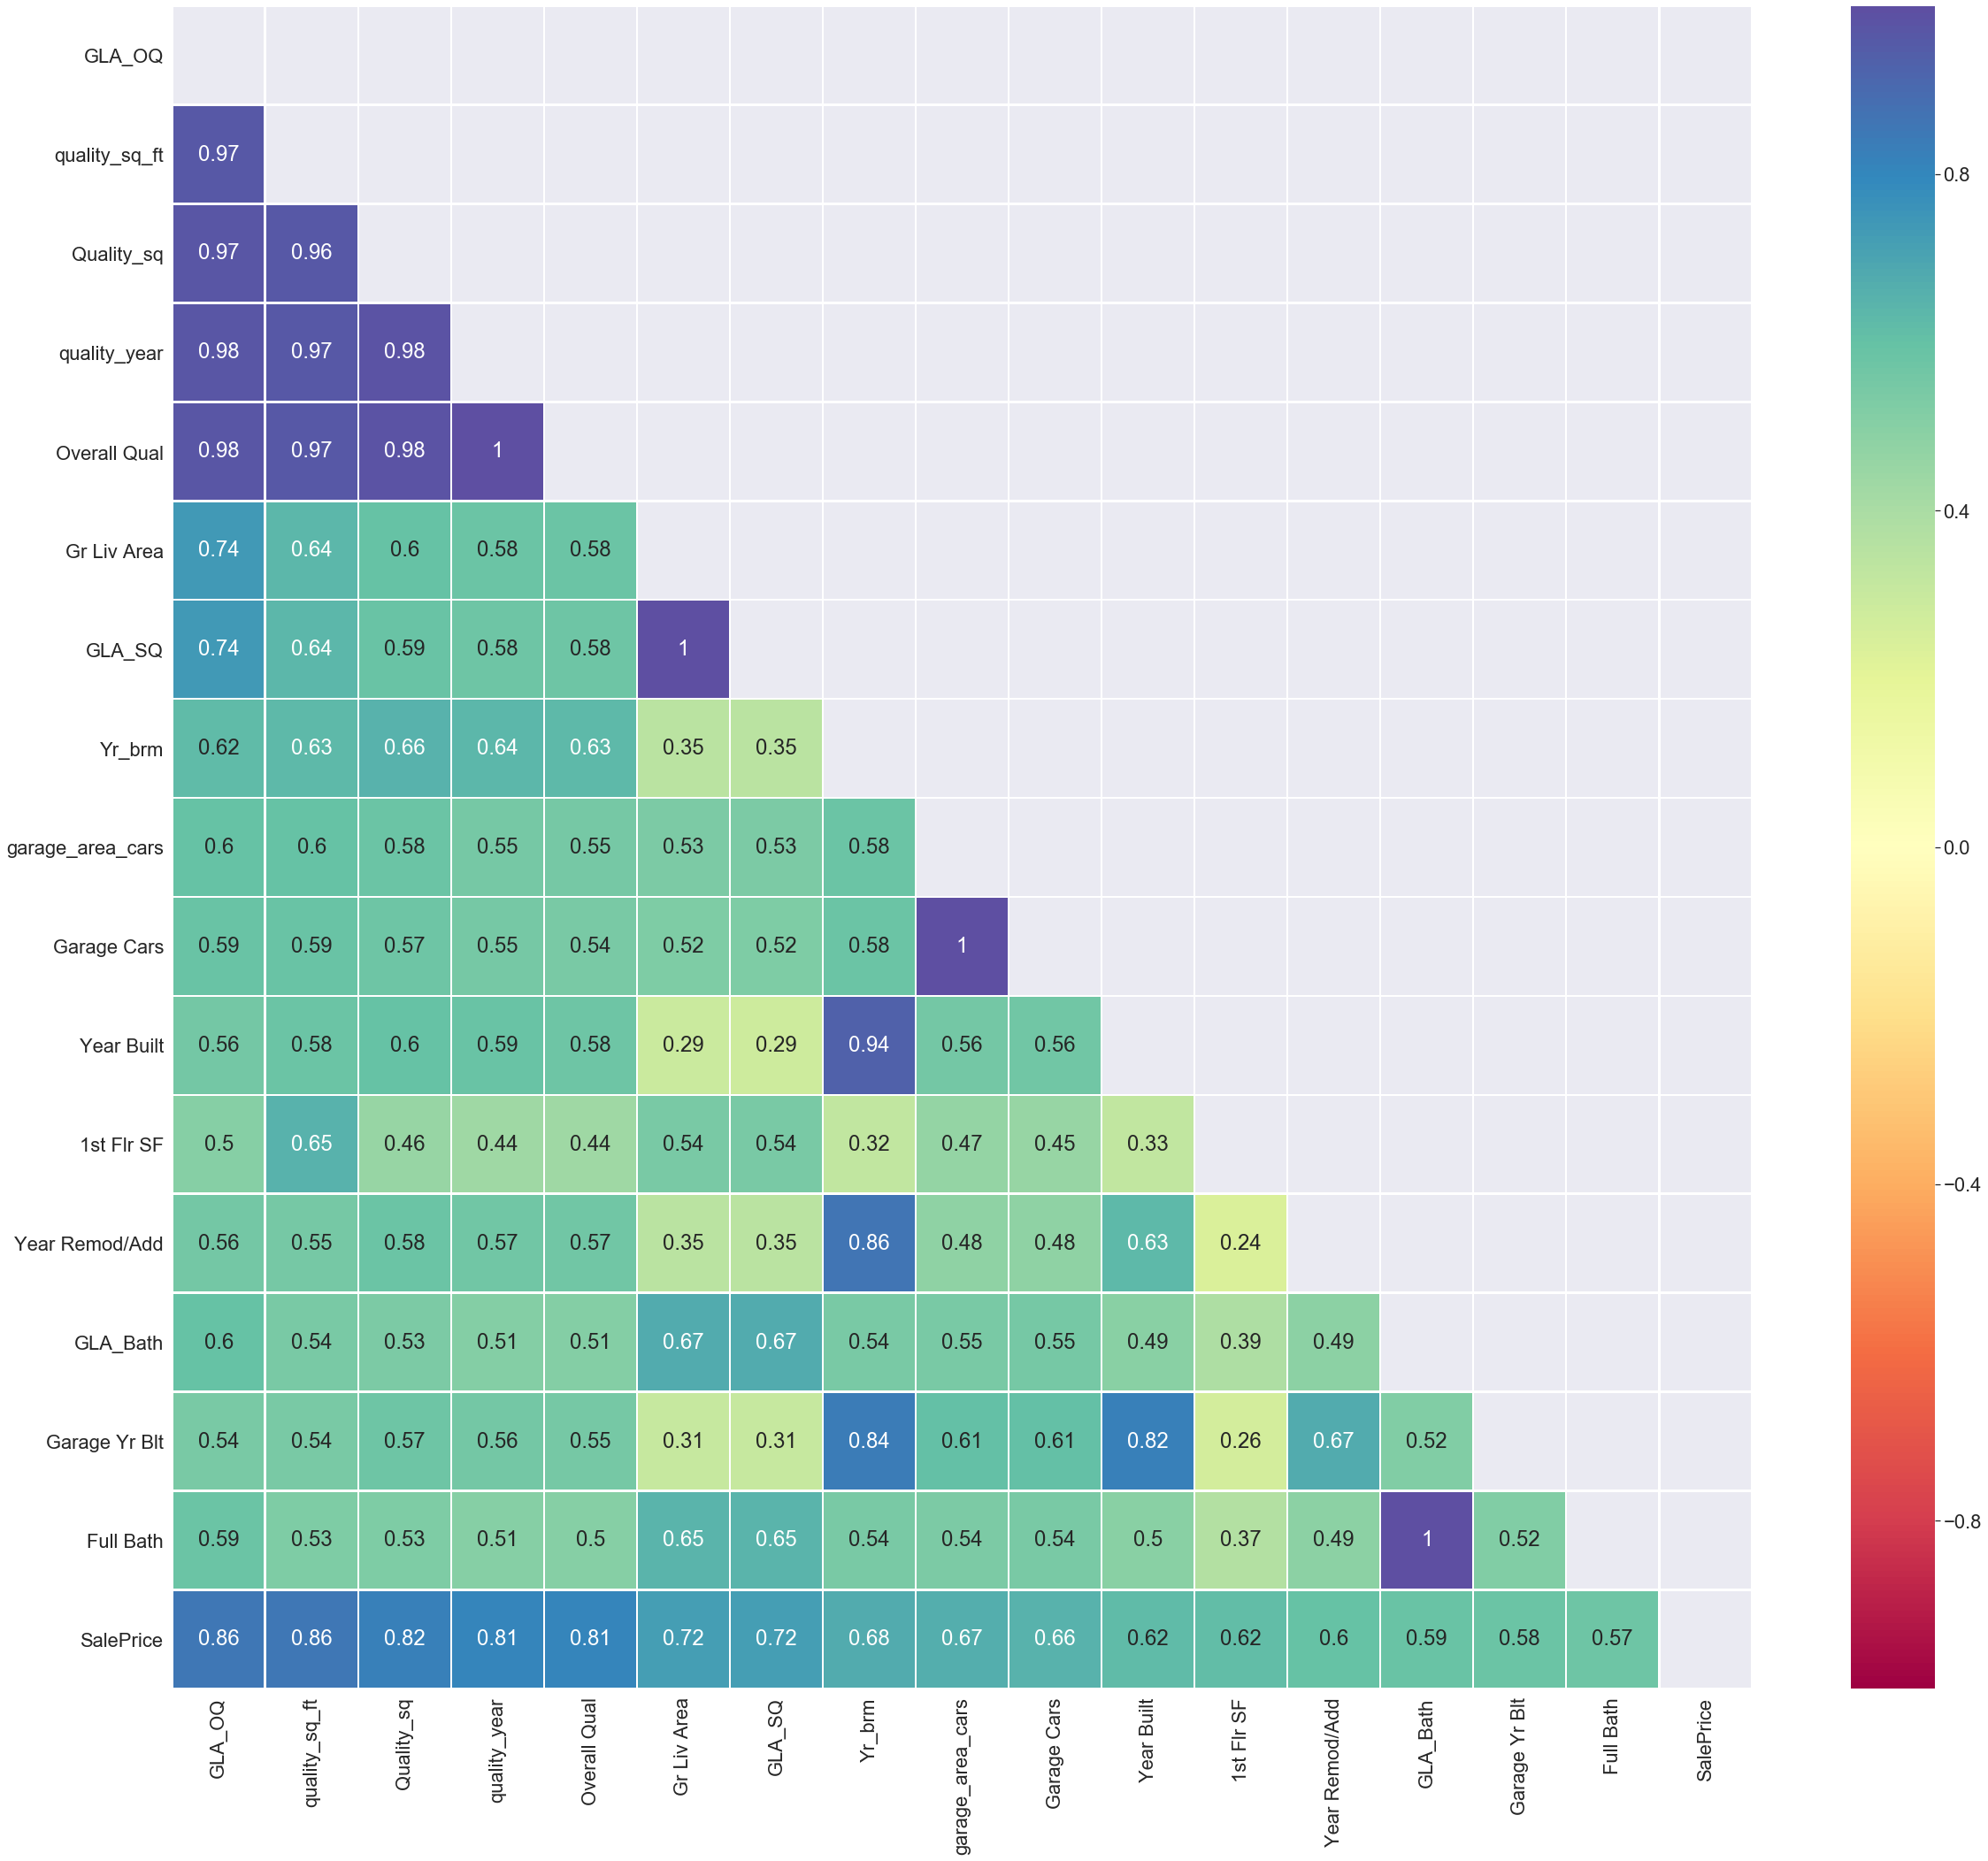

In [51]:
plt.figure(figsize = (40, 35))
plt.xticks(rotation=45)
mask = np.zeros_like(corr_2)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale = 2)
ax = sns.heatmap(corr_2, mask=mask, annot=True, cmap='Spectral', vmax=1, vmin=-1,
            square=False, linewidths=1.5,  cbar_kws={"shrink": 1.0}, xticklabels='auto')


In [43]:
corr_1 = ames_train[[
            'GLA_OQ',
            'Quality_sq',
            'quality_year', 
            'Overall Qual',
            'quality_sq_ft',
            'Gr Liv Area',
            'garage_area_cars',
            'GLA_Bath',
            'Garage Area',
            'Garage Cars',
            'GLA_SQ',
            'Total Bsmt SF',
            'Yr_brm',
            '1st Flr SF',
            'Year Built',
            'Year Remod/Add',
            'SalePrice']].corr()

In [46]:
corr_2 = ames_train_numeric_log[[
            'GLA_OQ',
            'quality_sq_ft',
            'Quality_sq', 
            'quality_year',
            'Overall Qual',
            'Gr Liv Area',
            'GLA_SQ',
            'Yr_brm',
            'garage_area_cars',
            'Garage Cars',
            'Year Built',
            '1st Flr SF',
            'Year Remod/Add',
            'GLA_Bath',
            'Garage Yr Blt',
            'Full Bath',
            'SalePrice']].corr()

In [45]:
ames_train_numeric_log.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
GLA_OQ,0.857322
quality_sq_ft,0.855315
Quality_sq,0.820529
quality_year,0.807762
Overall Qual,0.805379
Gr Liv Area,0.721365
GLA_SQ,0.719733
Yr_brm,0.677392
garage_area_cars,0.667354


In [ ]:
tested_col = [
            'Overall Qual',
            '1st Flr SF',
            'Gr Liv Area',
            'TotRms AbvGrd',
            'garage_area_cars',
            'quality_year',
            'quality_sq_ft',
            'qual_neig',
            'Quality_sq',
            'GLA_OQ',
            'GLA_Bath',
            'Neighborhood',
            'Bldg Type',
            'Exterior 1st',
            
            
            ]

In [ ]:
ames_train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)

In [ ]:
corr_1 = ames_train[[
            'Overall Qual',
            'Yr_brm',
            'Total Bsmt SF', 
            '1st Flr SF',
            'Gr Liv Area',
            'Full Bath',
            'TotRms AbvGrd',
            'garage_area_cars',
            'quality_year',
            'quality_sq_ft',
            'qual_neig',
            'Quality_sq',
            'GLA_OQ',
            'GLA_Bath',
            'Neighborhood',
            'Bldg Type',
            'Exterior 1st',
            'SalePrice']].corr()
corr_2 = ames_train[[
            'Overall Qual',
            'Yr_brm',
            '1st Flr SF',
            'Gr Liv Area',
            'Full Bath',
            'garage_area_cars',
            'quality_year',
            'quality_sq_ft',
            'SalePrice']]